# CARS

TABKA DE CONTENIDO

1. intro


Imagine que un fabricante de automóviles ha desarrollado prototipos para un nuevo vehículo. Antes de introducir el modelo nuevo, el fabricante quiere determinar qué vehículos existentes en el mercado son los más parecidos al prototipo; esto es, cómo los vehículos pueden ser agrupados, qué grupo es el más similar a este modelo y por tanto contra qué modelos competirá.

Nuestro objetivo es usar métodos de clustering para encontrar los clusters más distintivos de vehículos. Resumirá los vehículos existentes y ayudará a los fabricantes a tomar una decisión sobre el suministro de nuevos modelos.

2. Modules

In [77]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 


<a name="3"></a>
## <b> <font color='green'> Loading, exploring and pre-processing data </a>

In [57]:
!cd data && ls

cars.csv


In [58]:
df = pd.read_csv('data/cars.csv')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [59]:
df.shape

(159, 16)

In [60]:
df.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

In [61]:
print ("Shape of dataset before cleaning: ", df.size)

# convert features to numerical (those who should be numerical)
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')


# drop rows with nan values
df = df.dropna()
df = df.reset_index(drop=True)

print ("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [62]:
# we're gonna select just a few characteristics
featureset = df[['engine_s',  'horsepow', 'width', 'length', 'fuel_cap', 'mpg']]

In [63]:
# normalization

x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:3]

array([[0.11428571, 0.21518987, 0.28143713, 0.30625832, 0.13364055,
        0.43333333],
       [0.31428571, 0.43037975, 0.46107784, 0.5792277 , 0.31797235,
        0.33333333],
       [0.35714286, 0.39240506, 0.52694611, 0.62849534, 0.35483871,
        0.23333333]])

All values are now between 0 and 1.

## Clustering

In [101]:
# distance matrix

import numpy as np

import scipy

leng = feature_mtx.shape[0]
#D = scipy.zeros([leng,leng])
D = np.zeros((leng, leng))

for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [102]:
D

array([[0.        , 0.48689625, 0.58602457, ..., 0.23007097, 0.19136392,
        0.17803683],
       [0.48689625, 0.        , 0.14630061, ..., 0.32741937, 0.60647595,
        0.5404592 ],
       [0.58602457, 0.14630061, 0.        , ..., 0.41608439, 0.68728413,
        0.61413197],
       ...,
       [0.23007097, 0.32741937, 0.41608439, ..., 0.        , 0.36941548,
        0.30579706],
       [0.19136392, 0.60647595, 0.68728413, ..., 0.36941548, 0.        ,
        0.11131274],
       [0.17803683, 0.5404592 , 0.61413197, ..., 0.30579706, 0.11131274,
        0.        ]])

En el clustering aglomerativo, en cada iteración, el algoritmo debe actualizar la matriz de distancia para reflejar la distancia de los clusters recientemente formados con los restantes.
Los siguientes métodos están soportados en Scipy para calcular las distancias entre clusters:


```
- single
- complete
- average
- weighted
- centroid
```

Utilizaremos **complete**

In [99]:
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [103]:
import pylab
from scipy.cluster import hierarchy

print(type(D), D.shape)


#import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<class 'numpy.ndarray'> (117, 117)


Esencialmente, el clustering jerárquico NO requiere un número pre-establecido de clusteres. Sin embargo, en algunas aplicaciones, queremos una partición de clusteres disjuntos como en el "flat clustering". Entonces, puede utilizar una línea de corte:

In [66]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 4, 4, 5, 3, 3, 5, 4, 4, 4, 3, 4, 3, 3, 4, 5, 5, 4, 4, 4, 2, 1,
       9, 5, 5, 3, 5, 3, 5, 5, 5, 8, 6, 6, 6, 3, 3, 1, 4, 5, 4, 7, 4, 3,
       7, 4, 6, 1, 5, 5, 4, 3, 1, 5, 5, 4, 1, 4, 4, 4, 4, 3, 3, 7, 1, 5,
       5, 4, 4, 4, 5, 5, 5, 4, 7, 4, 3, 5, 4, 3, 2, 1, 5, 4, 3, 4, 5, 3,
       4, 3, 5, 5, 3, 5, 5, 4, 4, 4, 5, 4, 4, 1, 1, 1, 1, 5, 4, 1, 5, 1,
       5, 7, 1, 5, 5, 1, 1], dtype=int32)

In [67]:
set(clusters)

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [68]:
# tmb. podemos pre-establecer el número de clusters
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2,
       3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 3, 1, 2, 2, 1, 1], dtype=int32)

In [69]:
set(clusters)

{1, 2, 3, 4, 5}

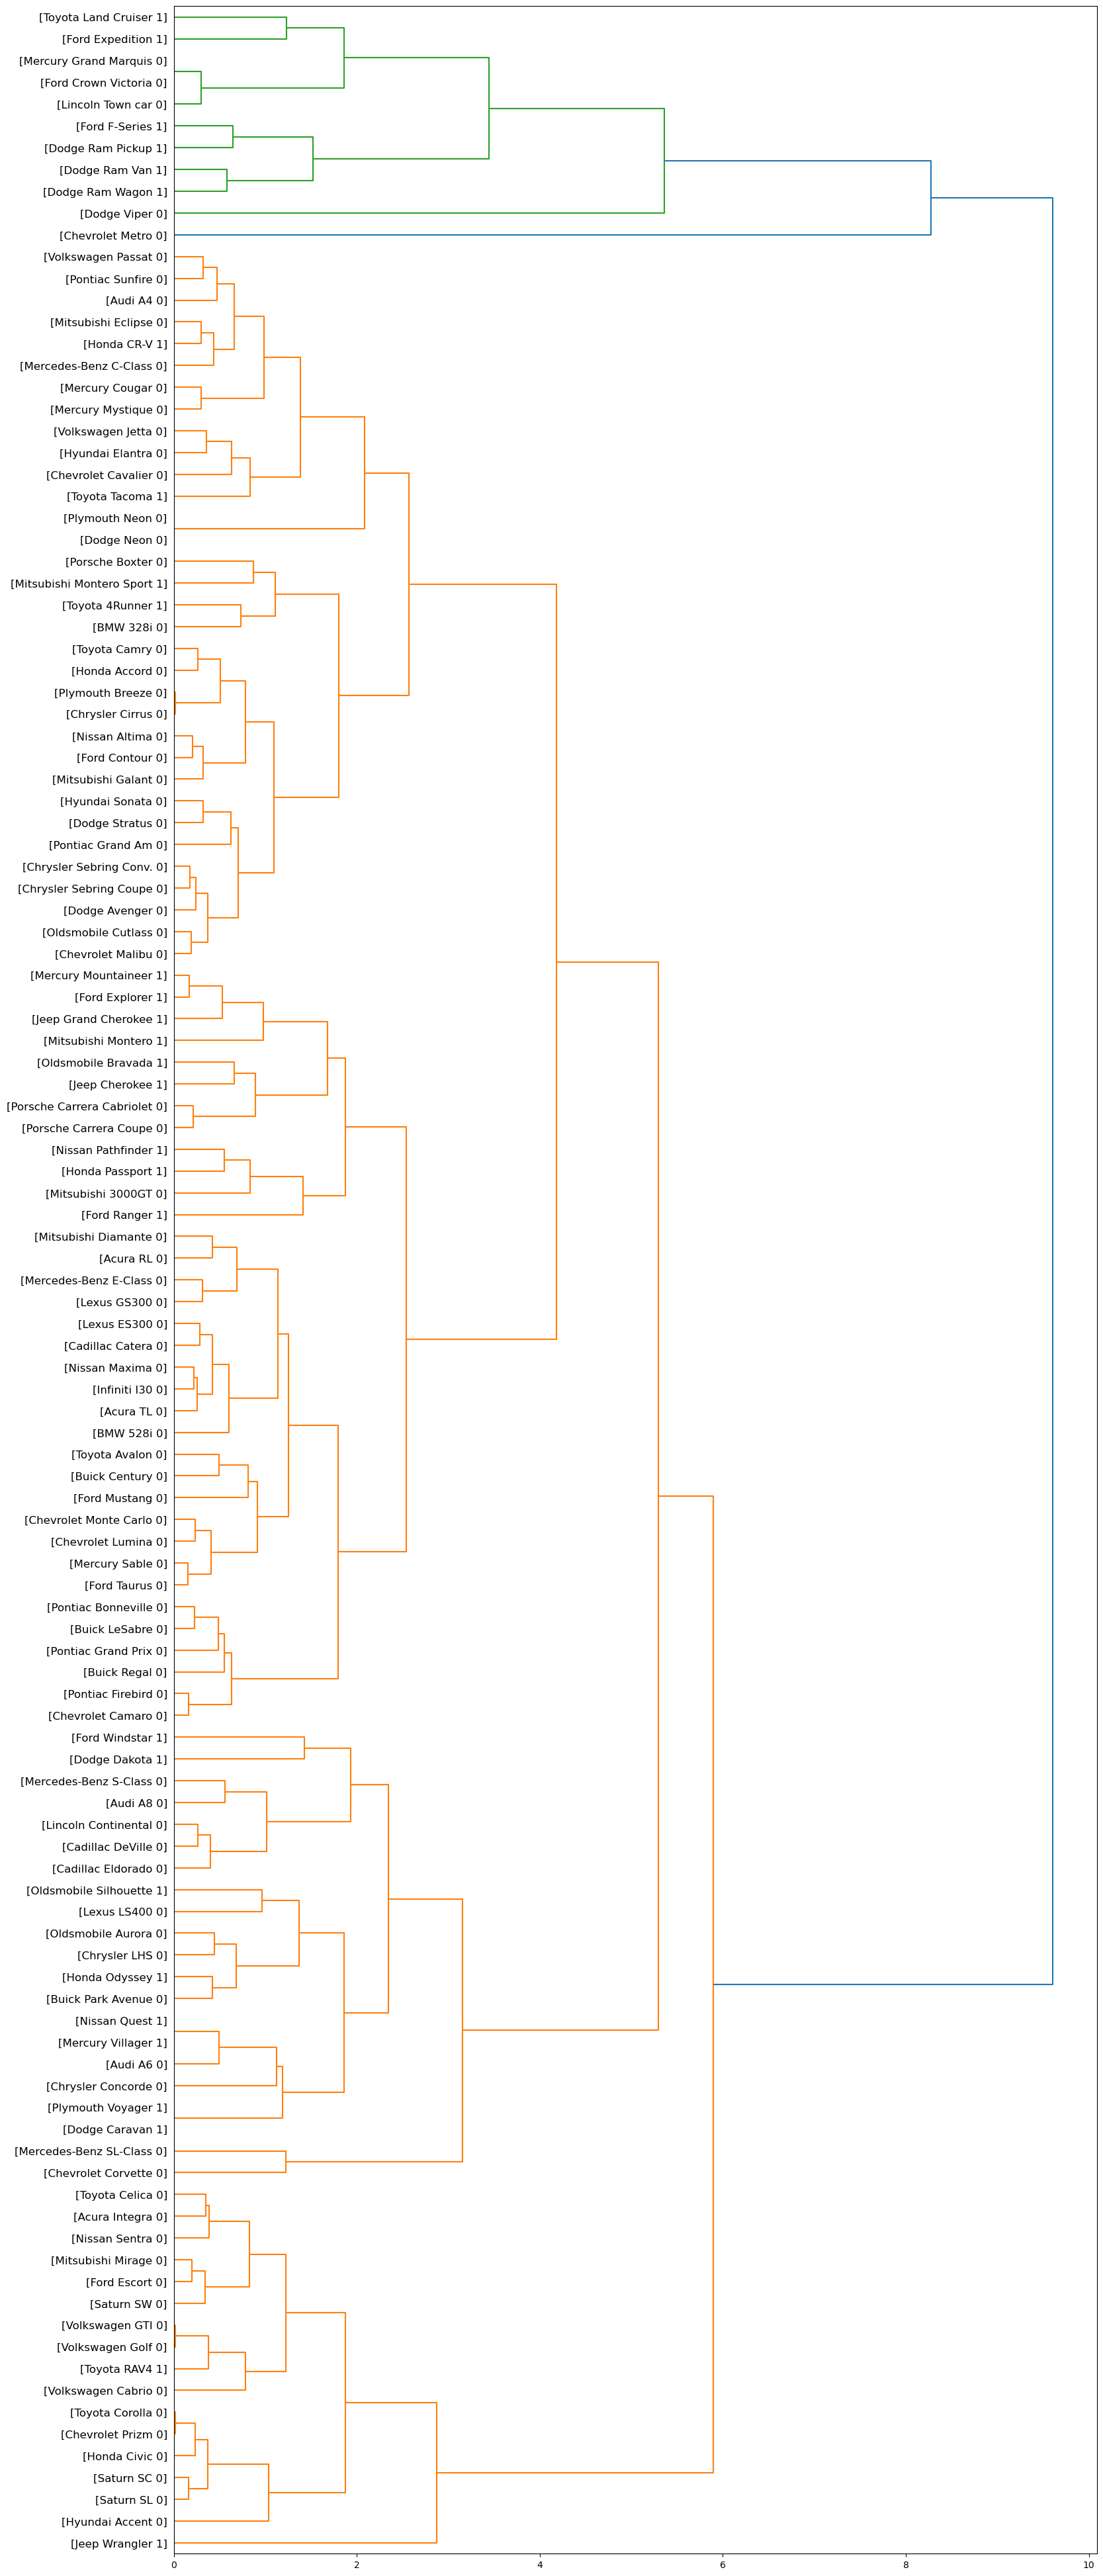

In [70]:
# imprimimos el dendograma
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  
                              leaf_label_func=llf, 
                              leaf_rotation=0, 
                              leaf_font_size =12, 
                              orientation = 'right')

## Clustering with scikitlearn 

In [71]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [72]:
type(feature_mtx)

numpy.ndarray

In [73]:
from scipy.spatial.distance import pdist, squareform

# Assuming X is your data matrix
# Compute pairwise distances
distance_matrix = pdist(X)

# Convert pairwise distances to a square distance matrix
distance_matrix = squareform(distance_matrix)

In [75]:
distance_matrix

array([[0.        , 0.48689625, 0.58602457, ..., 0.23007097, 0.19136392,
        0.17803683],
       [0.48689625, 0.        , 0.14630061, ..., 0.32741937, 0.60647595,
        0.5404592 ],
       [0.58602457, 0.14630061, 0.        , ..., 0.41608439, 0.68728413,
        0.61413197],
       ...,
       [0.23007097, 0.32741937, 0.41608439, ..., 0.        , 0.36941548,
        0.30579706],
       [0.19136392, 0.60647595, 0.68728413, ..., 0.36941548, 0.        ,
        0.11131274],
       [0.17803683, 0.5404592 , 0.61413197, ..., 0.30579706, 0.11131274,
        0.        ]])

Ahora podemos usar la función "AgglomerativeClustering" de scikit-learn que realiza un clustering jerárquico utilizando un enfoque bottom up. El criterio de enlace determina la métrica utilizada para la estrategia de combinación:

- Ward minimiza la suma de las diferencias cuadráticas entre todos los clusters. Es un enfoque de varianza mínima y en este sentido es similar a la función objetivo de k-means pero atacado con un enfoque de clustering aglomerativo.
- Maximun o complete linkage minimiza la distancia máxima entre observaciones de pares de clusters.
- Average minimiza el promedio de distancias entre observaciones de pares de clusters.

In [78]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 4, 4, 2, 4, 0, 2, 4, 4, 4, 4, 4, 0, 0, 4, 2, 2, 4, 4, 4, 0, 2,
       5, 2, 2, 4, 2, 4, 2, 2, 2, 0, 1, 1, 1, 4, 4, 2, 4, 2, 4, 1, 3, 4,
       1, 4, 1, 2, 2, 2, 3, 4, 2, 2, 2, 4, 3, 3, 3, 4, 4, 0, 0, 1, 2, 2,
       2, 4, 3, 3, 3, 2, 2, 4, 1, 3, 4, 2, 4, 0, 0, 2, 2, 4, 4, 3, 2, 4,
       3, 4, 2, 2, 4, 2, 2, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       3, 1, 2, 2, 2, 2, 2])

In [80]:
# nuevo campo para mostrar el cluster de cada fila
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,4


Text(0, 0.5, 'mpg')

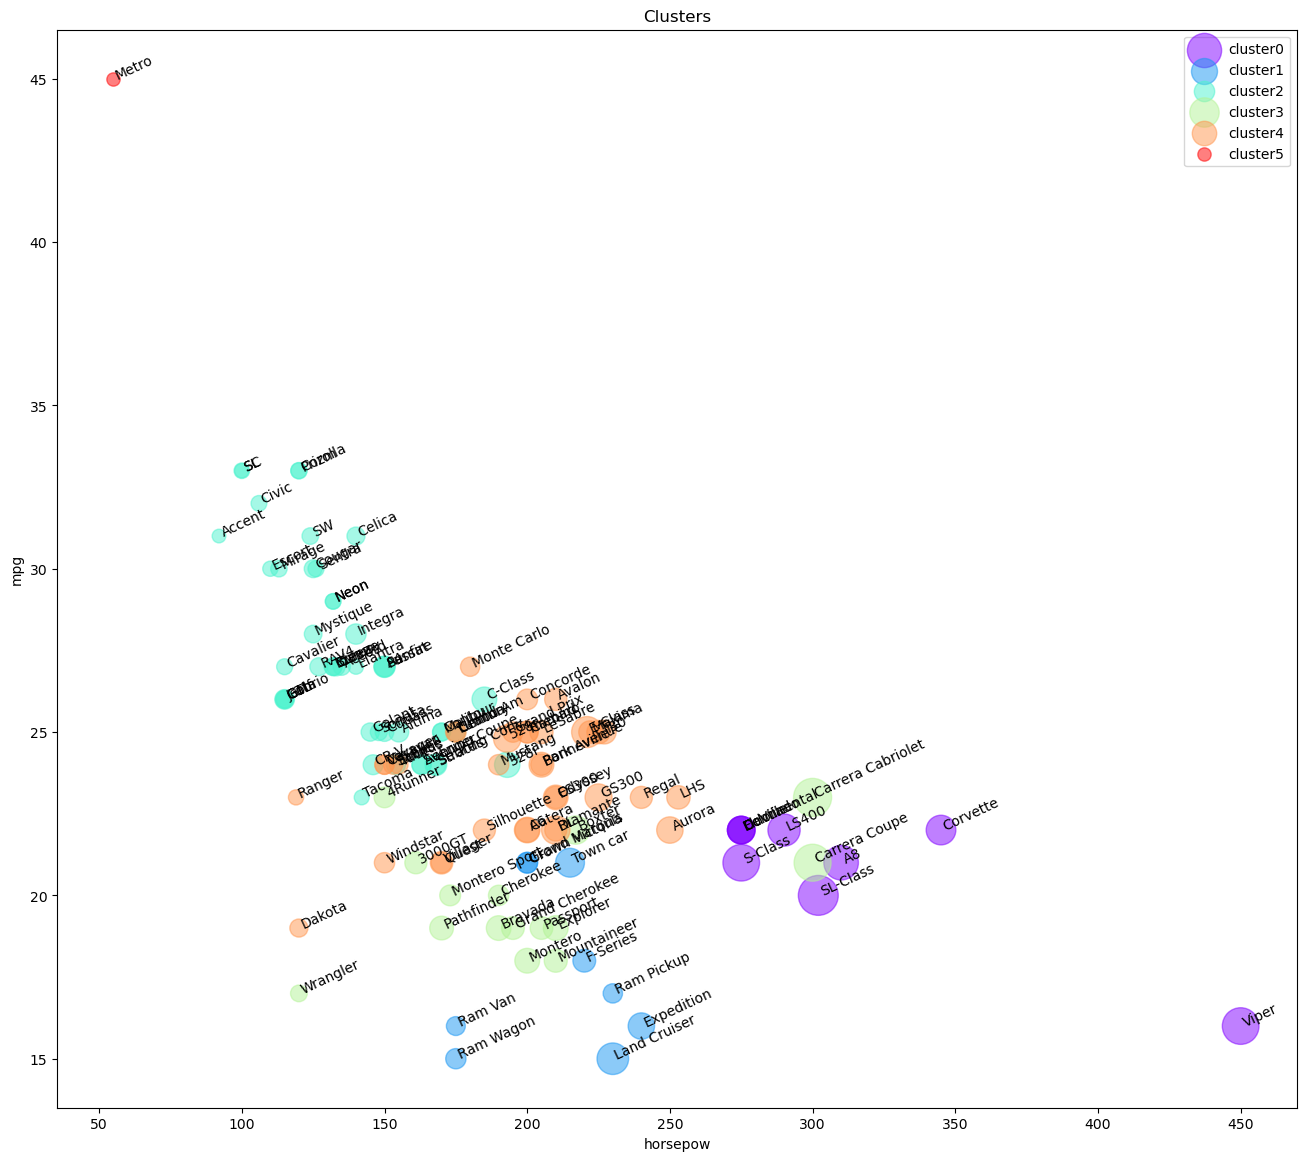

In [84]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for label, color in zip(range(n_clusters), colors):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=[color], label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


Estamos viendo la distribución de cada cluster en el gráfico de dispersión, pero no es claro donde está el centroide de cada cluster. Más aún, hay 2 tipos de vehículos en nuestro dataset, "truck (camión)" (valor de 1 en la columna type) y "car".  Por lo tanto, los usamos para distinguir las clases y resumir el clúster. Primero contamos el número de casos en cada grupo:

In [85]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0      9
1         0.0      3
          1.0      6
2         0.0     43
          1.0      3
3         0.0      4
          1.0     11
4         0.0     28
          1.0      9
5         0.0      1
Name: cluster_, dtype: int64

Ahora vemos las características de cada cluster:

In [87]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

/tmp/ipykernel_293435/2585305412.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   310.777778  5.000000  20.888889  55.819444
1        0.0   205.000000  4.600000  21.000000  29.376667
         1.0   211.666667  4.483333  16.166667  29.024667
2        0.0   137.418605  2.165116  27.511628  17.244605
         1.0   138.333333  2.133333  24.666667  16.322000
3        0.0   244.500000  3.125000  21.750000  53.217500
         1.0   183.000000  3.500000  19.181818  26.053091
4        0.0   204.785714  3.328571  24.135714  28.053393
         1.0   158.222222  2.922222  22.000000  21.012111
5        0.0    55.000000  1.000000  45.000000   9.235000

Tenemos 3 clusters principales con la mayoría de los vehículos en ellos:

**Cars**:

-   Cluster 1: mpg casi alto y baja potencia
-   Cluster 2: buen mpg y horsepower, pero alto precio
-   Cluster 3: mpg bajo, alto horsepower y alto precio


**Trucks**:

-   Cluster 1: mpg casi alto dentro de los camiones, bajo horsepower y precio
-   Cluster 2: mpg casi bajo, horsepower medio y alto precio
-   Cluster 3: buen mpg y horsepower, bajo precio


Text(0, 0.5, 'mpg')

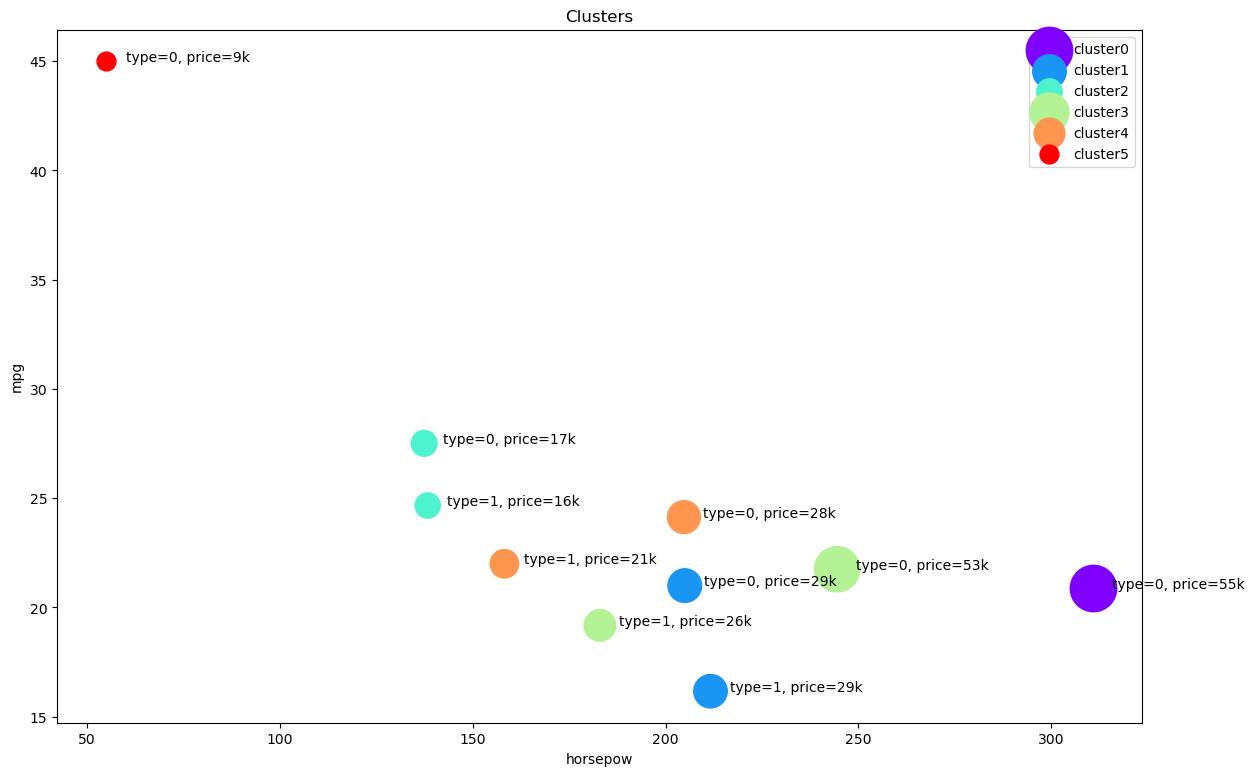

In [93]:
plt.figure(figsize=(14,9))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=[color], label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')